[API Documentation](https://financialmodelingprep.com/developer/docs/)
[Python for Finance Video](https://youtu.be/SJ9EeuS31bE)

            close
date             
1985-09-11   0.28
1985-09-10   0.27
1985-09-09   0.27
1985-09-06   0.27
1985-09-05   0.27
...           ...
1980-12-18   0.48
1980-12-17   0.46
1980-12-16   0.45
1980-12-15   0.49
1980-12-12   0.51

[1200 rows x 1 columns]


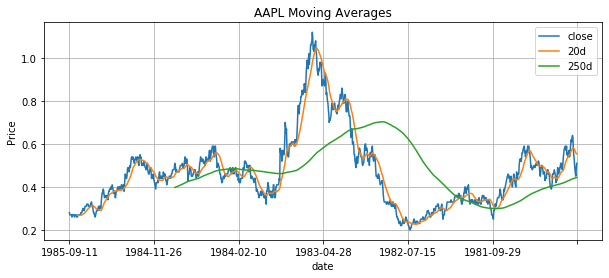

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import os

apikey = os.environ.get('apikey')

def stockpriceanalysis(symbol):
    stockprices = requests.get(f'https://financialmodelingprep.com/api/v3/historical-price-full/{symbol}?serietype=line&apikey={apikey}')
    stockprices = stockprices.json()
    
    stockprices = stockprices['historical'][-1200:]
    
    stockprices = pd.DataFrame.from_dict(stockprices)
    
    stockprices = stockprices.set_index('date')
    print (stockprices)
    stockprices['20d'] = stockprices['close'].rolling(20).mean()
    stockprices['250d'] = stockprices['close'].rolling(250).mean()
    
    stockprices[['close','20d','250d']].plot(figsize=(10,4))
    plt.grid(True)
    plt.title(symbol+' Moving Averages')
    plt.axis('tight')
    plt.ylabel('Price')

stockpriceanalysis('AAPL')